<a href="https://colab.research.google.com/github/dewifatimahazzahra/Data_Mining_Dewi_0110223142/blob/main/Dewi_Fatimah_A__0110223142_DM_tugas_praktikum11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install --upgrade scikit-learn

In [22]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
#Mounting Drive
from google.colab import drive
drive.mount('/content/gdrive')

#Membaca file CSV dari Google Drive, melewati baris yang bermasalah
df = pd.read_csv("gdrive/My Drive/ColabDataMining/regresi/Walmart_Sales.csv", on_bad_lines='skip', encoding='latin-1')
df


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [24]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [42]:
# Mengonversi kolom 'Date' ke format datetime dan mengubahnya menjadi detik sejak epoch
df['Date'] = pd.to_datetime(df['Date']).map(pd.Timestamp.timestamp)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   float64
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 402.3 KB


In [43]:
# Menampilkan nama-nama kolom pada DataFrame
df.columns

# Memilih subset kolom yang relevan untuk analisis dan membuat DataFrame baru
ndf = df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'CPI']]

# Menampilkan 5 baris pertama dari DataFrame baru
ndf.head()


,Store,Date,Weekly_Sales,Holiday_Flag,CPI
0,1,-9.223372,1643690.90,0,211.096358
1,1,-9.223372,1641957.44,1,211.242170
2,1,-9.223372,1611968.17,0,211.289143
3,1,-9.223372,1409727.59,0,211.319643
4,1,-9.223372,1554806.68,0,211.350143


# **Visualisasi**

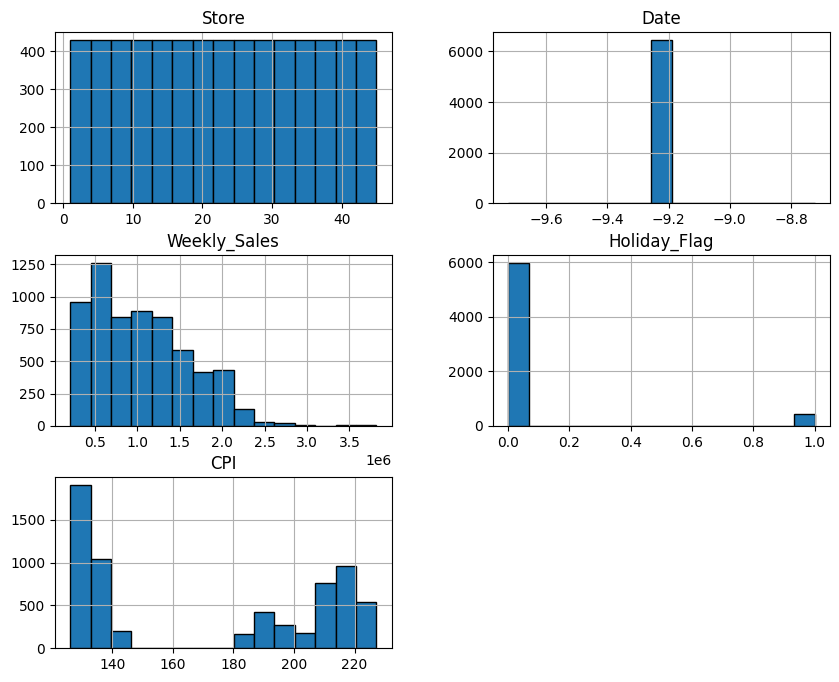

In [44]:
# Memilih kolom yang ingin divisualisasikan dalam histogram
viz = ndf[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'CPI']]

# Membuat histogram untuk kolom-kolom terpilih
viz.hist(bins=15, figsize=(10, 8), edgecolor='black')

# Menampilkan histogram
plt.show()


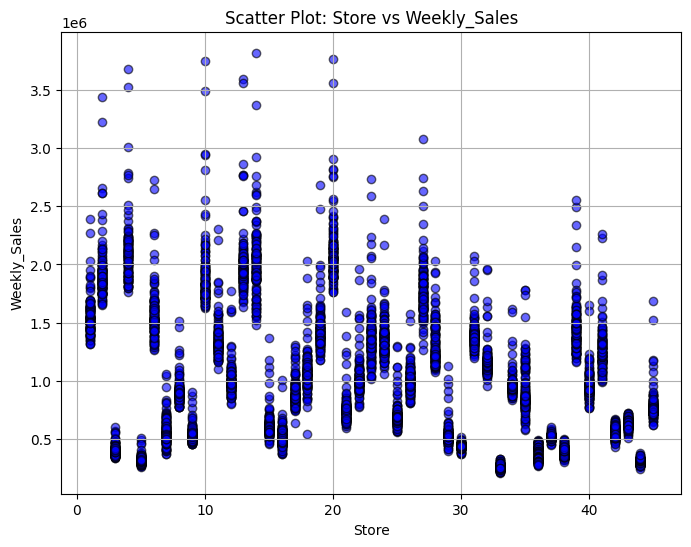

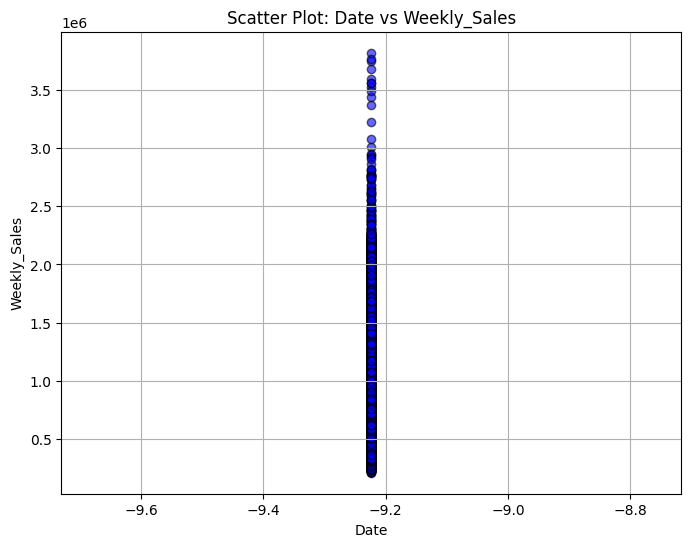

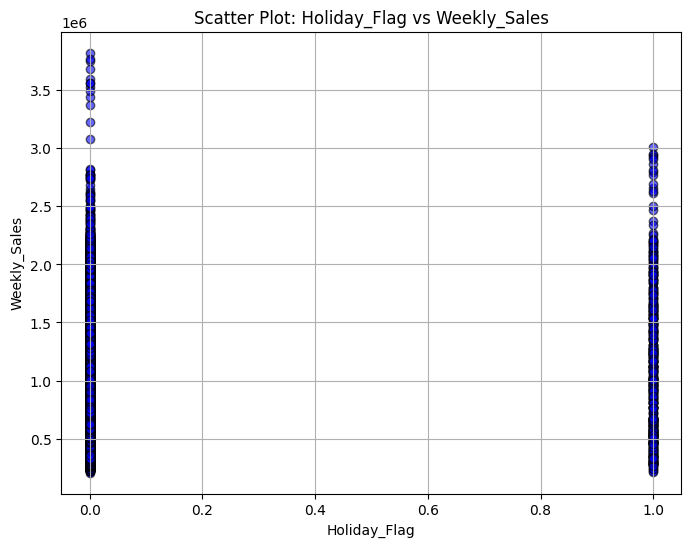

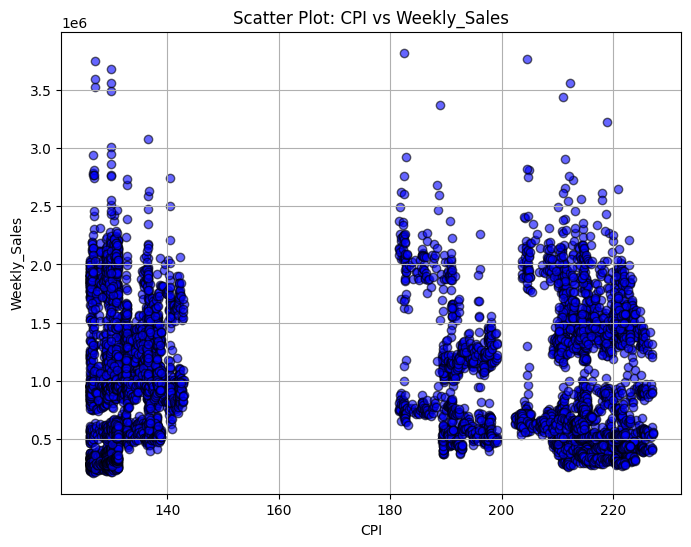

In [45]:
# Membuat scatter plot untuk setiap kolom terhadap 'Weekly_Sales'
columns = ['Store', 'Date', 'Holiday_Flag', 'CPI']
for col in columns:
    plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
    plt.scatter(ndf[col], ndf['Weekly_Sales'], color='blue', alpha=0.6, edgecolors='k')
    plt.xlabel(col)
    plt.ylabel("Weekly_Sales")
    plt.title(f"Scatter Plot: {col} vs Weekly_Sales")
    plt.grid(True)  # Menambahkan grid untuk membantu pembacaan
    plt.show()


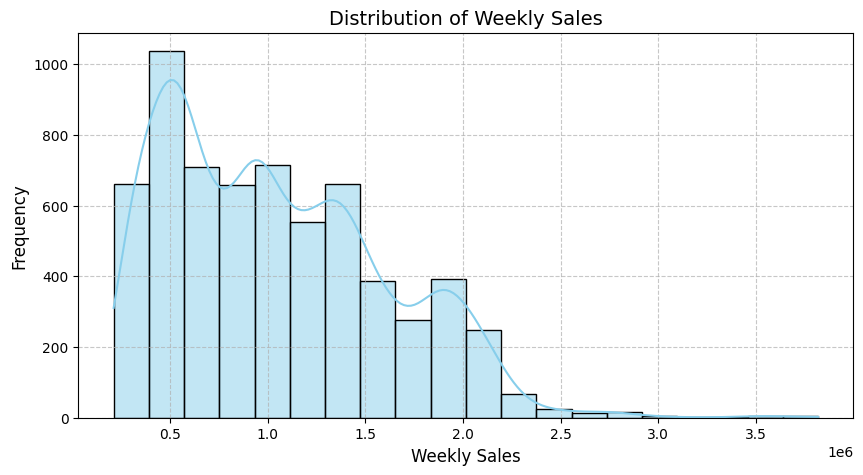

In [46]:
# Histogram distribusi 'Weekly_Sales'
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot
sns.histplot(ndf['Weekly_Sales'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales', fontsize=14)
plt.xlabel('Weekly Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Menambahkan grid untuk membantu pembacaan
plt.show()


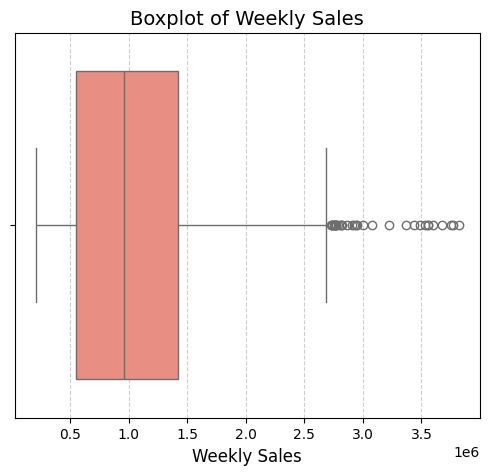

In [47]:
# Boxplot untuk distribusi 'Weekly_Sales'
plt.figure(figsize=(6, 5))  # Mengatur ukuran plot
sns.boxplot(x=ndf['Weekly_Sales'], color='salmon')  # Membuat boxplot dengan warna salmon
plt.title('Boxplot of Weekly Sales', fontsize=14)  # Judul plot
plt.xlabel('Weekly Sales', fontsize=12)  # Label sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Menambahkan grid untuk sumbu x
plt.show()


In [48]:
# Memisahkan fitur (X) dan target (y)
X = df[['Date', 'Store', 'Fuel_Price', 'CPI']]  # Fitur independen
y = df['Weekly_Sales']  # Target dependen

# Membagi data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Komentar:
# 1. `test_size=0.2`: Mengatur 20% data untuk pengujian, 80% untuk pelatihan.
# 2. `random_state=42`: Menjamin hasil pembagian data yang konsisten.


In [49]:
# Membuat model regresi linier dan melatihnya menggunakan data pelatihan
model = LinearRegression()  # Inisialisasi model regresi linier
model.fit(X_train, y_train)  # Melatih model menggunakan data pelatihan


LinearRegression()

In [50]:
# Menggunakan model untuk memprediksi hasil pada data uji
y_pred = model.predict(X_test)  # Prediksi target untuk data uji


In [51]:
# Menghitung Mean Squared Error (MSE) untuk mengevaluasi model
mse = mean_squared_error(y_test, y_pred)  # Menghitung MSE antara nilai asli dan prediksi
print("Mean Squared Error:", mse)  # Menampilkan hasil MSE


Mean Squared Error: 275788220815.36115


In [53]:
# Menghitung Root Mean Squared Error (RMSE) untuk evaluasi model
rmse = np.sqrt(mse)  # Menghitung RMSE dengan mengambil akar kuadrat dari MSE
print("Root Mean Squared Error (RMSE):", rmse)  # Menampilkan hasil RMSE


Root Mean Squared Error (RMSE): 525155.4253888663


In [54]:
# Menghitung Mean Absolute Error (MAE) untuk evaluasi model
mae = mean_absolute_error(y_test, y_pred)  # Menghitung MAE antara nilai asli dan prediksi
print("Mean Absolute Error (MAE):", mae)  # Menampilkan hasil MAE


Mean Absolute Error (MAE): 434617.00260962656


In [55]:
# Menghitung R-squared (R2) untuk evaluasi model
r2 = r2_score(y_test, y_pred)  # Menghitung R-squared (R2) antara nilai asli dan prediksi
print("R-squared (R2 Score):", r2)  # Menampilkan hasil R2


R-squared (R2 Score): 0.1439257701379687


In [56]:
# Menampilkan Koefisien dan Intercept dari model regresi
print("Coefficients:", model.coef_)  # Menampilkan koefisien regresi untuk masing-masing fitur
print("Intercept:", model.intercept_)  # Menampilkan intercept (nilai konstanta) dari model


Coefficients: [     0.         -15707.73626386  -5038.60137214  -2077.47983658]
Intercept: 1781601.1174337873


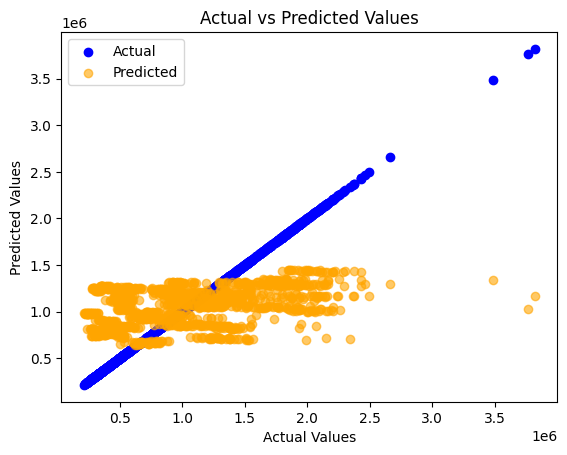

In [57]:
# Visualisasi nilai aktual vs prediksi
plt.scatter(y_test, y_test, color='blue', label='Actual')  # Menampilkan nilai aktual
plt.scatter(y_test, y_pred, color='orange', label='Predicted', alpha=0.6)  # Menampilkan nilai prediksi
plt.xlabel("Actual Values")  # Label sumbu X
plt.ylabel("Predicted Values")  # Label sumbu Y
plt.title("Actual vs Predicted Values")  # Judul plot
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot
